IMPORT DATASET AND LIBRARIES

In [87]:
# import data
import requests

file_id = '1jfJTdbk9yWL-tBlbrvS56ADbMxYkVfsW'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

r = requests.get(url, stream=True)
with open('data.csv', 'wb') as f:
    for chunk in r.iter_content(chunk_size=32768):
        if chunk:
            f.write(chunk)

print('data.csv downloaded successfully!')

data.csv downloaded successfully!


In [88]:
# import Pandas
import pandas as pd

In [89]:
# show data
cars = pd.read_csv('data.csv')
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


DATA CLEANING

**1. Handle missing data**

In [90]:
# identify missing values
cars.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [91]:
# name missing values in Market Category "unknown"
cars['Market Category'] = cars['Market Category'].fillna('unknown')

In [92]:
# remove rows with missing values
cars = cars.dropna (axis=0)
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**2. Data Type Conversion**

In [93]:
# Ensure that columns are of the correct data type for analysis
cars.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


**3. Filter Data**

In [94]:
# filter dataset to include only cars from 1995 and later
cars = cars.loc[cars['Year'] >= 1995].copy()
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**4. String Operations**

In [95]:
# standardize text entries by converting following coloumns' entries to lowercase
cars['Vehicle Style'] = cars['Vehicle Style'].str.lower()

In [96]:
# standardize text entries by converting following coloumns' entries to lowercase
cars['Market Category'] = cars['Market Category'].str.lower()

In [97]:
# renaming columns to Highway MPG and City MPG
cars = cars.rename(columns={
    'highway MPG': 'Highway MPG',
    'city mpg': 'City MPG',
    'Driven_Wheels': 'Driven Wheels'
})

In [98]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500


FEATURING ENGINEERING

**1. Create new columns**

In [99]:
# create a new column total mpg that is the avg of city mpg and highway mpg
cars['Total MPG'] = (cars['City MPG'] + cars['Highway MPG']) / 2
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP,Total MPG
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,46120,19.5
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,56670,19.5
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50620,19.5
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50920,19.5


In [100]:
# create a new column called Price per HP calculated as MSRP / Engine HP
cars['Price per HP'] = cars['MSRP'] / cars['Engine HP']
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5,137.716418
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5,135.500000
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0,121.166667
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0,128.043478
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500,23.0,150.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,46120,19.5,153.733333
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,56670,19.5,188.900000
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50620,19.5,168.733333
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50920,19.5,169.733333


EXPLORATORY DATA ANALYSIS (EDA)

**1. Descriptive Statistics**

In [101]:
# calculate summary statistics (mean, median(50%), standard diviation) for the following columns: Engine HP, MSRP, Popularity, Highway MPG, City Mpg
cars_statistic = cars[['Engine HP', 'MSRP', 'Popularity', 'Highway MPG', 'City MPG']].agg(['mean', 'median', 'std']).round(2)
print(cars_statistic)

        Engine HP      MSRP  Popularity  Highway MPG  City MPG
mean       256.86  43434.31     1568.01        26.53     19.47
median     240.00  31265.00     1385.00        26.00     18.00
std        108.75  61540.31     1452.13         7.53      6.65


**2. Group Analysis**

In [102]:
# Group the data by the following columns and calculate the average MSRP and Popularity for each group: Driven_Wheels, Vehicle Size, Engine Cylinders
cars_grouped_dv = cars.groupby('Driven Wheels') [['MSRP', 'Popularity']].mean().round(2)
cars_grouped_vs = cars.groupby('Vehicle Size') [['MSRP', 'Popularity']].mean().round(2)
cars_grouped_ec = cars.groupby('Engine Cylinders') [['MSRP', 'Popularity']].mean().round(2)
print(cars_grouped_dv)
print(cars_grouped_vs)
print(cars_grouped_ec)


                       MSRP  Popularity
Driven Wheels                          
all wheel drive    59397.28     1510.26
four wheel drive   38460.88     1760.02
front wheel drive  24651.96     1397.78
rear wheel drive   60469.09     1775.52
                  MSRP  Popularity
Vehicle Size                      
Compact       37774.33     1474.73
Large         56786.95     1906.31
Midsize       40902.68     1452.50
                        MSRP  Popularity
Engine Cylinders                        
0.0                 34511.92     1986.54
3.0                 13547.00      791.95
4.0                 25548.03     1435.98
5.0                 22858.33      856.42
6.0                 36503.34     1694.27
8.0                 65559.78     1756.04
10.0               184123.82     1830.03
12.0               290142.19      830.33
16.0              1757223.67      820.00


**3. Visualizations**

Generate the following visualizations:

- A histogram that shows a distribution for the city mpg column.
- A bar chart showing the average MSRP for each category in Vehicle Size.
- A scatter plot showing the relationship between Engine HP and MSRP.
- A boxplot showing the distribution of MSRP for each category in Driven_Wheels.
- A line plot showing trends in average city mpg and highway MPG for different Transmission Type.

In [103]:
import seaborn as sns

In [104]:
import matplotlib.pyplot as plt

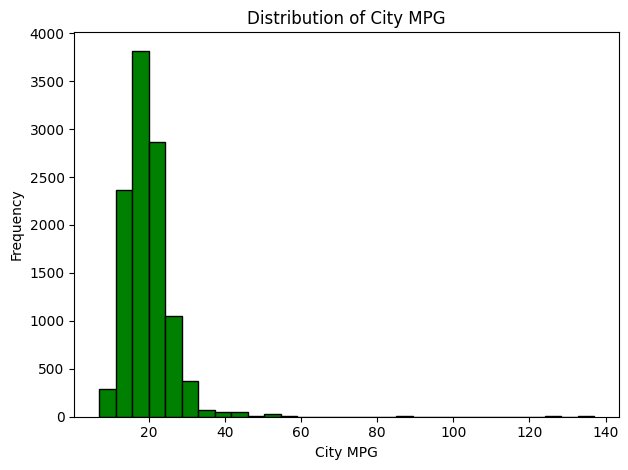

In [105]:
# generate a  histogram that shows a distribution for the city mpg column
plt.hist(
	cars['City MPG'],
	bins=30,
	alpha=1,
	edgecolor='black',
	color='green')

plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.title('Distribution of City MPG')

plt.tight_layout()
plt.show()

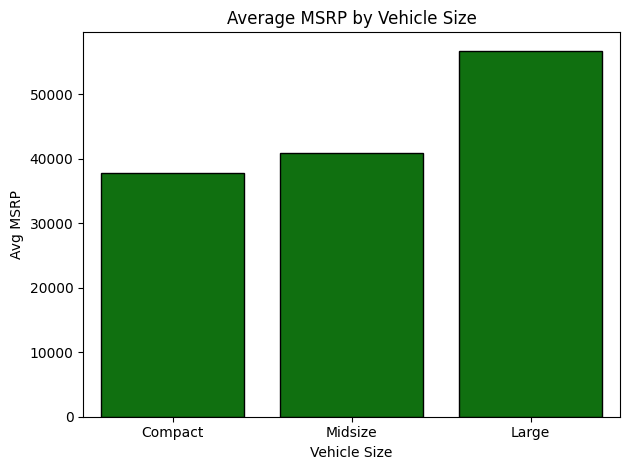

In [106]:
# generate a  bar chart showing the average MSRP (pricing) for each category in Vehicle Size (market size)
# What trends exist in pricing and market size?
sns.barplot(cars, x= 'Vehicle Size', y='MSRP', color='green', edgecolor='black', errorbar=None, estimator='mean')
plt.xlabel('Vehicle Size')
plt.ylabel('Avg MSRP')
plt.title('Average MSRP by Vehicle Size')

plt.tight_layout()
plt.show()

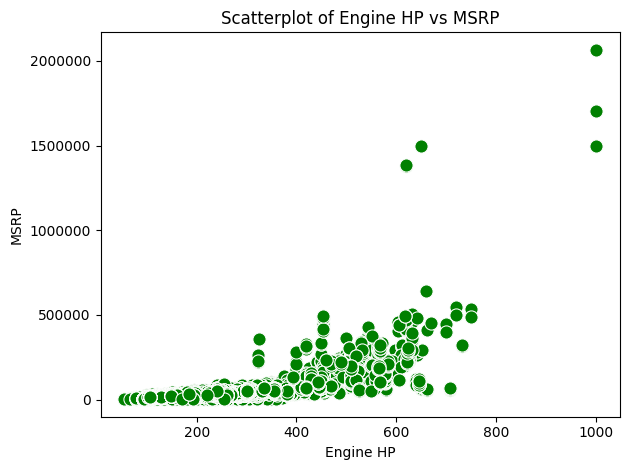

In [107]:
# generate a scatter plot showing the relationship between Engine HP (horsepower) and MSRP (price)
# How does horsepower relate to price?
sns.scatterplot(cars, x='Engine HP', y='MSRP', color='green', marker='o', s=90)

plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Scatterplot of Engine HP vs MSRP')

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

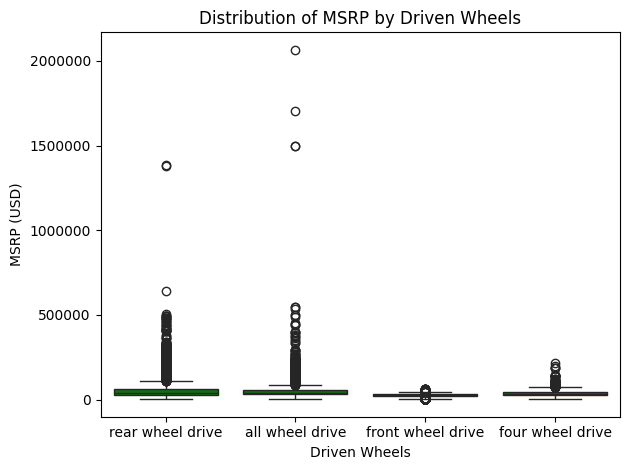

In [108]:
# generate a boxplot showing the distribution of MSRP (price) for each category in Driven Wheels
# Is there a significant difference in price for different drivetrains?
sns.boxplot(cars, y='MSRP', x='Driven Wheels', color='green')

plt.xlabel('Driven Wheels')
plt.ylabel('MSRP (USD)')
plt.title('Distribution of MSRP by Driven Wheels')

plt.ticklabel_format(style='plain', axis= 'y')

plt.tight_layout()
plt.show()


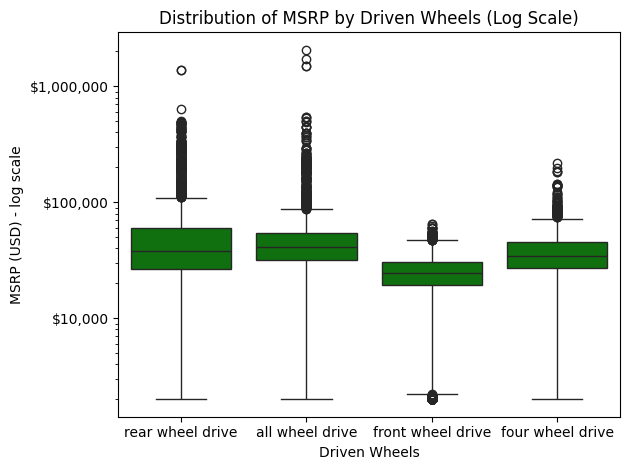

In [109]:
# log scale to handle extreme price outliers
import matplotlib.ticker as mtick

sns.boxplot(cars, y='MSRP', x='Driven Wheels', color='green')

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}'))

plt.xlabel('Driven Wheels')
plt.ylabel('MSRP (USD) - log scale')
plt.title('Distribution of MSRP by Driven Wheels (Log Scale)')

plt.tight_layout()
plt.show()

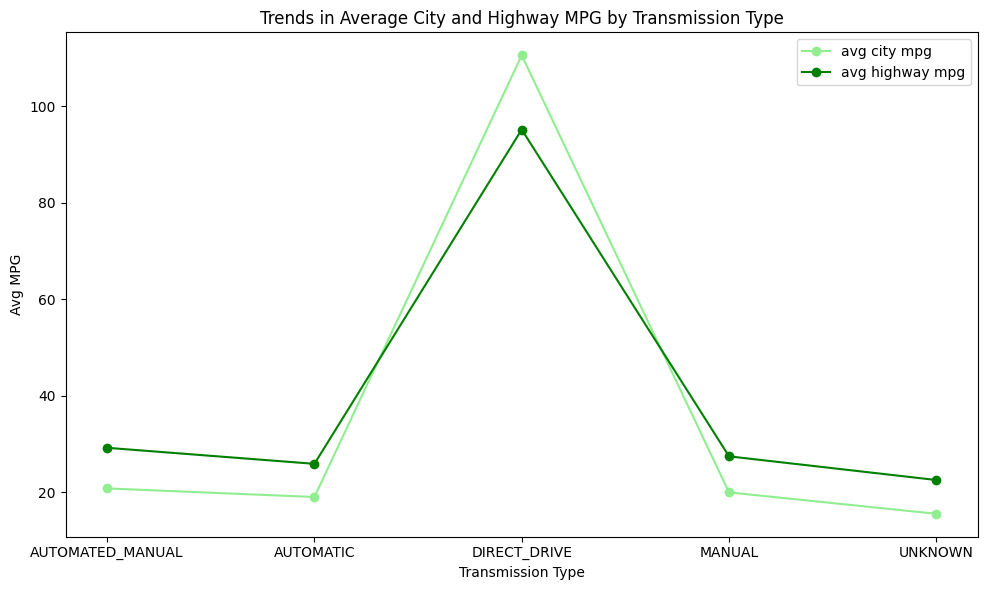

In [116]:
# generate a line plot showing trends in average city mpg and highway MPG for different Transmission Type.
# How do MPG (City and Highway) trends change with transmission type?
avg_mpg = (cars.groupby('Transmission Type')[['City MPG', 'Highway MPG']].mean().reset_index())

plt.figure(figsize=(10, 6))
plt.plot(avg_mpg['Transmission Type'], avg_mpg['City MPG'], label='avg city mpg', marker='o', color='lightgreen')
plt.plot(avg_mpg['Transmission Type'], avg_mpg['Highway MPG'], label='avg highway mpg', marker='o', color='green')

plt.xlabel('Transmission Type')
plt.ylabel('Avg MPG')
plt.title('Trends in Average City and Highway MPG by Transmission Type')
plt.legend()
plt.tight_layout()
plt.show()

**4. Correlation Analysis**

In [111]:
# Investigate the correlation between the following variables: Engine HP, MSRP, Popularity, city mpg, and highway MPG.
cars_correlation = cars[
    ['Engine HP', 'MSRP', 'Popularity', 'City MPG', 'Highway MPG']
].corr(method='pearson')
cars_correlation

,Engine HP,MSRP,Popularity,City MPG,Highway MPG
Engine HP,1.000000,0.654161,0.030604,-0.497366,-0.451302
MSRP,0.654161,1.000000,-0.057331,-0.246801,-0.225431
Popularity,0.030604,-0.057331,1.000000,-0.011671,-0.030835
City MPG,-0.497366,-0.246801,-0.011671,1.000000,0.843070
Highway MPG,-0.451302,-0.225431,-0.030835,0.843070,1.000000
